In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *

# QR (m $\geq$ n)

## Complexity Analysis

Show that our implementation scale linearly in "m"

Text(0, 0.5, 'Time (s)')

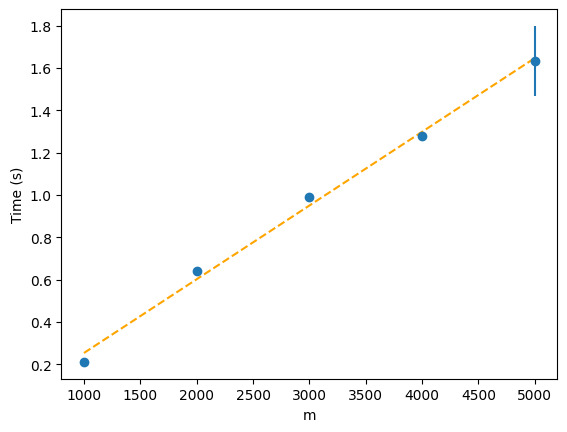

In [31]:
n = 256 # represent the number of neurons
trials = 5 #numbber of trials for each value of m

a, b = -1, 1 # range of the random data

START = 1000
END = 5001
STEP = 1000

mean_and_variance = [] # list of tuple (mean, variance) for each value of m

for m in range(START, END, STEP):
    times_trials = []
    for _ in range(trials):
        # generate random data
        X = np.random.uniform(a, b, size=(m, n))
        # compute the mean and variance of the data

        start_time = time.time()
        _, _ = thin_QR(X)
        end_time = time.time()
        times_trials.append(end_time - start_time)
        
    mean_and_variance.append((np.mean(times_trials), np.var(times_trials)))

# plot the mean and variance of the data

m_values = np.array(range(START, END, STEP))
means = np.array([x[0] for x in mean_and_variance])
variances = np.array([x[1] for x in mean_and_variance])

a, b = np.polyfit(m_values, means, 1)
fit_line = a * m_values + b  # compute y values for the fit line

plt.errorbar(range(START, END, STEP), [x[0] for x in mean_and_variance], yerr=[x[1] for x in mean_and_variance], fmt='o')
plt.plot(m_values, fit_line, linestyle='--', color='orange')
plt.xlabel('m')
plt.ylabel('Time (s)')

## Accuracy Analysis

Show that our implementatio holds the theoretical accuracy/stability analysis. We use an "a posteriori" test exploiting the residual:
$||X - QR||$

In [29]:
# Perform QR decomposition
m, n = 1000, 500
a, b = 1e-10, 1e-9
X = np.random.uniform(a, b, size=(m, n))
h, R = thin_QR(X)

# Compute the residual
R = np.vstack((R, np.zeros((m-n, n))))
residual = np.linalg.norm(X - apply_householders_matrix(h, R)) / np.linalg.norm(X) #TODO: controllare se bisogna dividere per la norma di X

# Display the residual
print(f"Residual ||X - QR||: {residual}")

Residual ||X - QR||: 1.3129539371863912e-15


# Least-Square Problem

## Complexity Analysis

## Accuracy Analysis